# How can my code make choices?  

In [2]:
num = 1
if num >100:
    print('I am greater than 100')
else:
    print( 'I am smaller than 100')
print('I am done' )

I am smaller than 100
I am done


The second line of this code uses the keyword `if` to tell Python that we want to make a choice. If the test that follows the if statement is true, the body of the `if` (i.e., the set of lines indented underneath it) is executed, and “I am greater than 100” is printed. If the test is false, the body of the `else` is executed instead, and “I am smaller than 100” is printed. Only one or the other is ever executed before continuing on with program execution to print “I am done”:

# Short-hand version of the same code

In [3]:
num = 37
print(f'{num} is  greater than 100' if num > 100 else f'{num} is smaller than 100')
print('I am done')


37 is smaller than 100
I am done


The `else` statement is not mandatory if we don't want the code to do something else sif the condition is not satisfed 

In [4]:
num = 42
print('before conditional...')
if num > 100:
    print(num, 'is greater than 100')
print('...after conditional')


before conditional...
...after conditional


# What if many choices have to be made...? 
The `elif` statement (short hand for `else` + `if`) helps with the task

In [11]:
num = 0.0

if num > 0:
    print(num, 'is positive')
elif num == 0: # notice that we use two equal signs and not just one!!!
    print(num, 'is zero')
else:
    print(num, 'is negative')


0.0 is zero


In [13]:
num = -0
print(num, 'is positive' if num > 0 else 'is zero' if num == 0 else 'is negative')


0 is zero


Along with the > and == operators we have already used for comparing values in our conditionals, there are a few more options to know about:
* `<` and `>` for greater and smaller than
* `==` for equal to
* `!=` for not equal
* `>=` and `<=` for greater or equal and smaller or equal than

We can also combine tests using `and` and `or`.
A `and` statement will return true if and only if all of the conditions are true. On the other hand, the `or` statement will return true as long as one of the conditions is true

In [14]:
if (1 > 0) and (-1 >= 0):
    print('both parts are true')
else:
    print('at least one part is false')


at least one part is false


In [15]:
if (1 < 0) or (1 >= 0):
    print('at least one test is true')


at least one test is true


# `True` and  `False`
`True`and `False`  are special words in Python called `booleans`, which represent truth values. A statement such as `1 < 0` returns the value `False`, while `-1 < 0` returns the value `True`. 


Now that we’ve seen how conditionals work, we can use them to check for the suspicious features we saw in our inflammation data.

In [16]:
import numpy as np
import glob
import matplotlib.pyplot as plt
file_list = glob.glob('data/inflammation*.csv')
print(file_list)

['data/inflammation-06.csv', 'data/inflammation-05.csv', 'data/inflammation-10.csv', 'data/inflammation-12.csv', 'data/inflammation-08.csv', 'data/inflammation-02.csv', 'data/inflammation-09.csv', 'data/inflammation-01.csv', 'data/inflammation-03.csv', 'data/inflammation-04.csv', 'data/inflammation-11.csv', 'data/inflammation-07.csv']


As these examples show, `glob.glob`’s result is a list of file and directory paths in arbitrary order. This means we can loop over it to do something with each filename in turn. In our case, the “something” we want to do is generate a set of plots for each file in our inflammation dataset.

If we want to start by analyzing just the first three files in alphabetical order, we can use the `sorted` built-in function to generate a new sorted list from the `glob.glob` output:

['data/inflammation-01.csv', 'data/inflammation-02.csv', 'data/inflammation-03.csv', 'data/inflammation-04.csv', 'data/inflammation-05.csv', 'data/inflammation-06.csv', 'data/inflammation-07.csv', 'data/inflammation-08.csv', 'data/inflammation-09.csv', 'data/inflammation-10.csv', 'data/inflammation-11.csv', 'data/inflammation-12.csv']
data/inflammation-01.csv


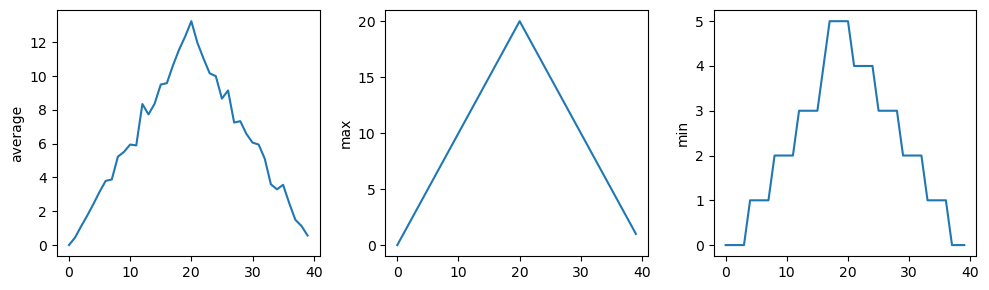

data/inflammation-02.csv


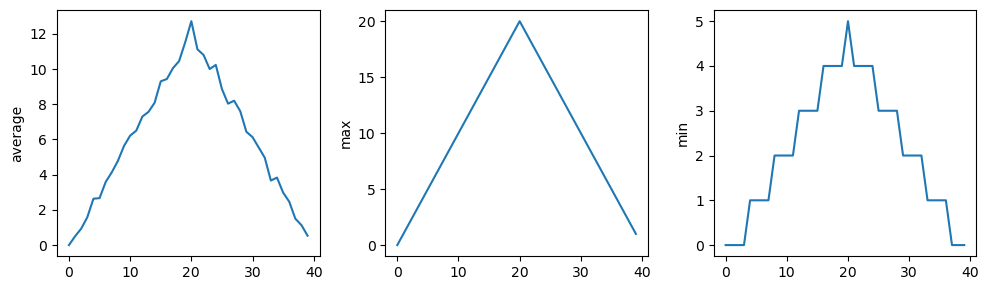

data/inflammation-03.csv


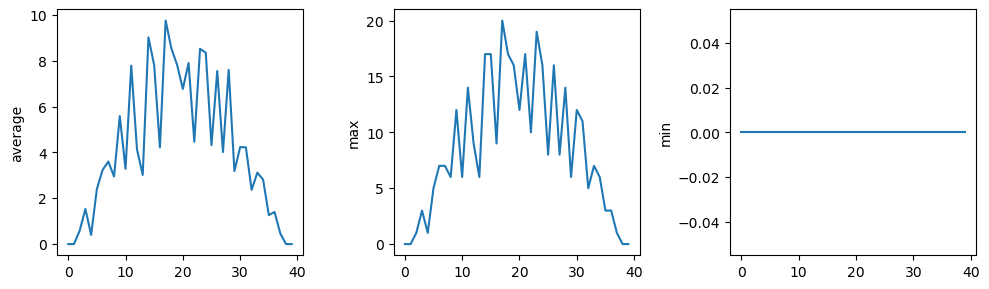

In [18]:
#previous lecture
print(sorted(file_list))
filenames = sorted(file_list)[0:3]
for filename in filenames:
    print(filename)
    data = np.loadtxt(fname=filename,delimiter = ',')
    fig = plt.figure(figsize=(10.0,3.0))
    
    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    axes1.set_ylabel('average')
    axes1.plot(np.mean(data,axis=0))
    
    axes2.set_ylabel('max')
    axes2.plot(np.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(np.min(data, axis=0))

    fig.tight_layout()
    plt.show()
    

From the first couple of plots, we saw that maximum daily inflammation exhibits a strange behavior and raises one unit a day. Wouldn’t it be a good idea to detect such behavior and report it as suspicious? Let’s do that! However, instead of checking every single day of the study, let’s merely check if maximum inflammation in the beginning (day 0) and in the middle (day 20) of the study are equal to the corresponding day numbers.

In [23]:
# data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
# data = np.loadtxt(fname='data/inflammation-02.csv', delimiter=',')
data = np.loadtxt(fname='data/inflammation-03.csv', delimiter=',')
data_rn = data +np.rand.rand(data.shape)
max_inflammation_0 = np.max(data, axis=0)[0]
max_inflammation_20 = np.max(data, axis=0)[20]

print(max_inflammation_0)
print(max_inflammation_20)

if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print('Suspicious looking maxima!')
elif np.sum(np.min(data, axis=0)) == 0:
    print('Minima add up to zero!')
else:
    print('Seems OK!')



0.0
12.0
Minima add up to zero!


In [27]:
data_rn = data + np.random.rand()

In [30]:
max_inflammation_0 = np.max(data_rn, axis=0)[0]
max_inflammation_20 = np.max(data_rn, axis=0)[20]

print(max_inflammation_0)
print(max_inflammation_20)

if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print('Suspicious looking maxima!')
elif np.sum(np.min(data_rn, axis=0)) == 0:
    print('Minima add up to zero!')
else:
    print('Seems OK!')


0.5198222147600458
12.519822214760046
Seems OK!


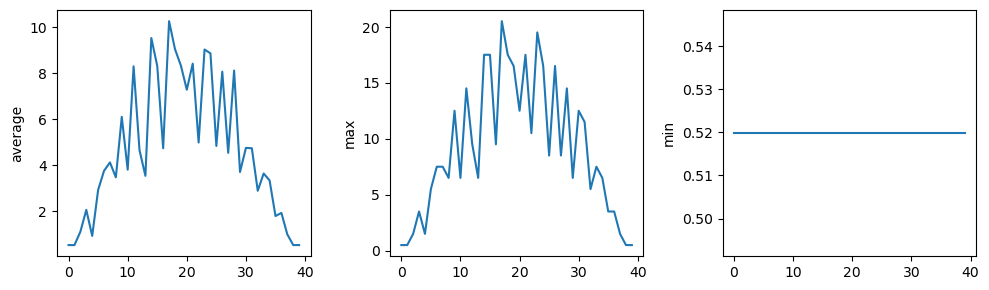

In [29]:
fig = plt.figure(figsize=(10.0,3.0))
    
axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(np.mean(data_rn,axis=0))

axes2.set_ylabel('max')
axes2.plot(np.max(data_rn, axis=0))

axes3.set_ylabel('min')
axes3.plot(np.min(data_rn, axis=0))

fig.tight_layout()
plt.show()

In [35]:
bool1 = True
boll2 = False

if bool1 == False or boll2 == True:
    print('Both statements are (one) true')
else:
    print('at least one statement is not true')

at least one statement is not true
